In [50]:
from train_models.tree.Brain010.formater import formate_datas
from train_models.tree.Brain010.filter import filter_datas


les Imports (Librairies)

In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import joblib
import json
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Lire le fichier Json **param.json**

In [52]:
with open('params.json', "r", encoding="utf-8") as f:
    data = json.load(f)
    params = data['params']
    result =   data['result']
    print(params)
    path_train  = data['path_formater_to_train']['data_to_train']
    path_filtered_data_train = data['path_formater_to_train']['data_formated']

    data_input = data['path_data_train']['data_input']
    data_output = data['path_data_train']['data_output']
    data_brain = data['path_brain']
    path_params_brains = data['path_param_brains']
    name_brain = data['name_brain']
    epochs_brain = data['epoch_brain']

    formated_data = data['path_formater_to_train']['data_formated']
    path_entry = data['path_data_train']['data_input']
    path_out = data['path_data_train']['data_output']

['TEMPERATURE_CONSIGNE [R]']


Formater les données pour entrainer le Model en utilisant **formater.py**

In [53]:
formate_datas(path_train , path_filtered_data_train)

0      1.712956e+09
1      1.712956e+09
2      1.712956e+09
3      1.712957e+09
4      1.712957e+09
           ...     
846    1.759300e+09
847    1.759301e+09
848    1.759301e+09
849    1.759301e+09
850    1.759301e+09
Name: Datetime, Length: 851, dtype: float64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  data formate success !!! >>>>>>>>>>>>>>>>>>>>>>>>>>>


Filtrer les données en utilisant **filter.py** en forction des paramétres préciser dans le **params.json** , pour l'entrainement du Model

In [54]:
filter_datas(formated_data , path_entry ,path_out)

training/data/formated_data/formated_data.csv
training/data/inputs_train/inputs.csv
        0
0   -10.0
1   -10.0
2    -9.4
3    -8.9
4    -8.4
..    ...
846  20.0
847  20.0
848  20.0
849  20.0
850  20.0

[851 rows x 1 columns]
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  data filter to train success !!! >>>>>>>>>>>>>>>>>>>>>>>>>>>


Entrainement du Model



In [55]:

df = pd.read_csv("training/data/formated_data/formated_data.csv", delimiter=",")


x = df[params]
y = df[result]
tree_model = DecisionTreeRegressor(max_depth=200000, random_state=42)
print(f'etttttt .. !!! voila ::: {x}{y}')

tree_model.fit(x, y)

etttttt .. !!! voila :::      TEMPERATURE_CONSIGNE [R]
0                       -10.0
1                       -10.0
2                        -9.4
3                        -8.9
4                        -8.4
..                        ...
846                      20.0
847                      20.0
848                      20.0
849                      20.0
850                      20.0

[851 rows x 1 columns]     TEMPERATURE_REPRISE [R]
0                  -9.520000
1                  -9.570000
2                  -9.050000
3                  -8.561538
4                  -8.130000
..                       ...
846                18.827273
847                19.033333
848                19.128000
849                18.425000
850                18.725000

[851 rows x 1 columns]


DecisionTreeRegressor(max_depth=200000, random_state=42)

Visualiser l'arbre

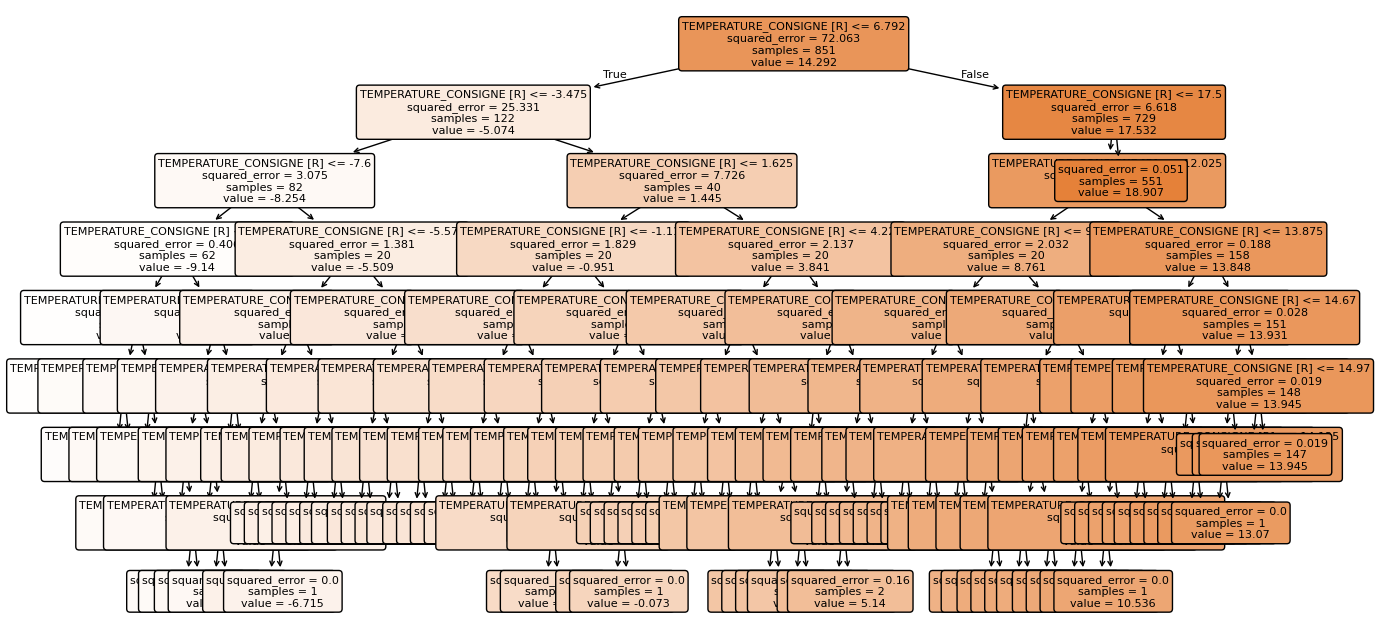

In [56]:
plt.figure(figsize=(15, 8))
plot_tree(tree_model, feature_names=x.columns, filled=True, rounded=True, fontsize=8)
plt.show()

Faire des Prédictions

Enregistrer le Model

In [57]:
joblib.dump(tree_model, "modele_arbre_decision.hdf5")


['modele_arbre_decision.hdf5']

Charger le Model


In [58]:
modele_charge = joblib.load("modele_arbre_decision.hdf5")


utiliser le Model

In [62]:
nouvelle_prediction = modele_charge.predict(x)
print(nouvelle_prediction)

[-9.38294086 -9.38294086 -9.0500001  -8.56153848 -8.13000017 -7.42750005
 -6.96499999 -6.44000004 -6.34705892 -5.81500004 -5.35999999 -4.74444453
 -4.28000002 -3.77000001 -3.30000002 -2.81000001 -2.26000002 -1.75499998
 -1.39499999 -0.6825     -0.185      -0.07272727  0.49        0.92
  1.34000001  1.86        2.39        2.99375005  3.26000008  3.66000004
  4.16499994  5.13999995  5.535       5.67272728  6.29000006  6.74000001
  7.22000003  7.84999995  7.93999986  9.125       9.20999992  9.88000006
 10.30500008 10.53571417 11.44       11.56       12.75       13.33
 13.38       13.94469118 13.94469118 13.94469118 13.94469118 13.94469118
 13.94469118 13.94469118 13.94469118 13.94469118 13.94469118 13.94469118
 13.94469118 13.94469118 13.94469118 13.94469118 13.94469118 13.94469118
 13.94469118 13.94469118 13.94469118 13.94469118 13.94469118 13.94469118
 13.94469118 13.94469118 13.94469118 13.94469118 13.94469118 13.94469118
 13.94469118 13.94469118 13.94469118 13.94469118 13.94469118 13

Faire le schemas pour evaluer le Model

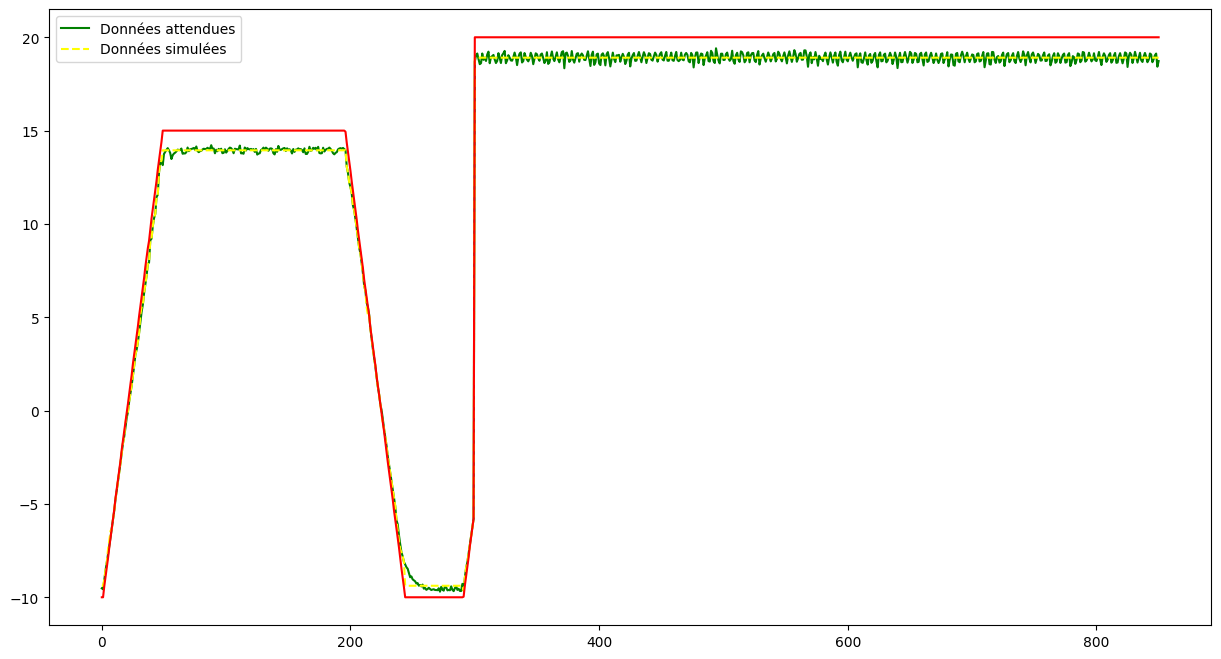

In [63]:
plt.figure(figsize=(15, 8))
plt.plot( y, label="Données attendues", color="green")
plt.plot( nouvelle_prediction, label="Données simulées ", color="yellow", linestyle="dashed")
plt.plot(x , color="red")
plt.legend()
plt.show()

     TEMPERATURE_CONSIGNE [R]
0                        20.0
1                        20.0
2                        20.0
3                        20.0
4                        20.0
..                        ...
308                      20.0
309                      20.0
310                      20.0
311                      20.0
312                      20.0

[313 rows x 1 columns]
             0
0    18.907476
1    18.907476
2    18.907476
3    18.907476
4    18.907476
..         ...
308  18.907476
309  18.907476
310  18.907476
311  18.907476
312  18.907476

[313 rows x 1 columns]


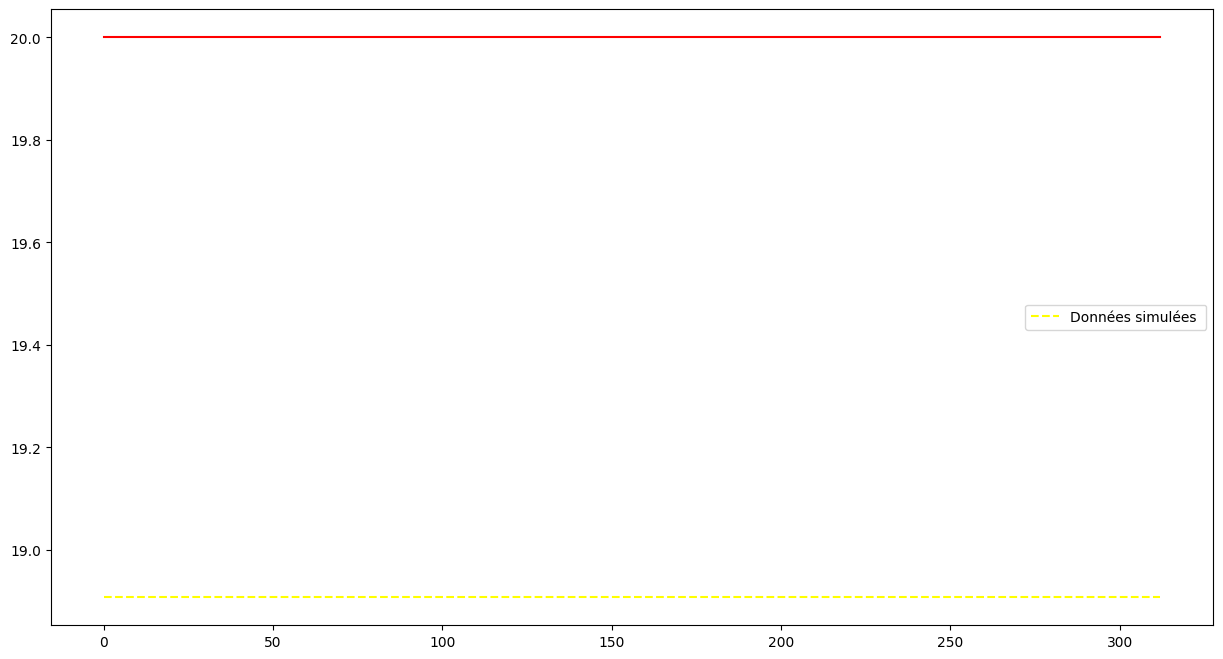

In [61]:
df_2 = pd.read_csv("training/data/formated_data_test/formated_data.csv", delimiter=",")
z = df_2[params]
print(z)
predictions = tree_model.predict(z)

out = pd.DataFrame(predictions)
print(out)
#print(predictions)
# Ajouter les prédictions dans le DataFrame pour comparaison
#df["Predicted_TEMPERATURE_REPRISE"] = predictions


#print(df[['TEMPERATURE_REPRISE [R]','Predicted_TEMPERATURE_REPRISE']])
plt.figure(figsize=(15, 8))
#plt.plot( , label="Données attendues", color="green")
plt.plot( out, label="Données simulées ", color="yellow", linestyle="dashed")
plt.plot(z , color="red")
plt.legend()
plt.show()